In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import pandas as pd

In [3]:
def voss(nrows, ncols=16):
    """Generates pink noise using the Voss-McCartney algorithm.
    
    nrows: number of values to generate
    rcols: number of random sources to add
    
    returns: NumPy array
    """
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    # the total number of changes is nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

In [4]:
y = voss(500000,64)
y_detrend = scipy.signal.detrend(y)

f,p = scipy.signal.welch(y,nperseg=50000,fs = 1,detrend=False)
f,p_detrend = scipy.signal.welch(y_detrend,nperseg=50000,fs = 1,detrend=False)


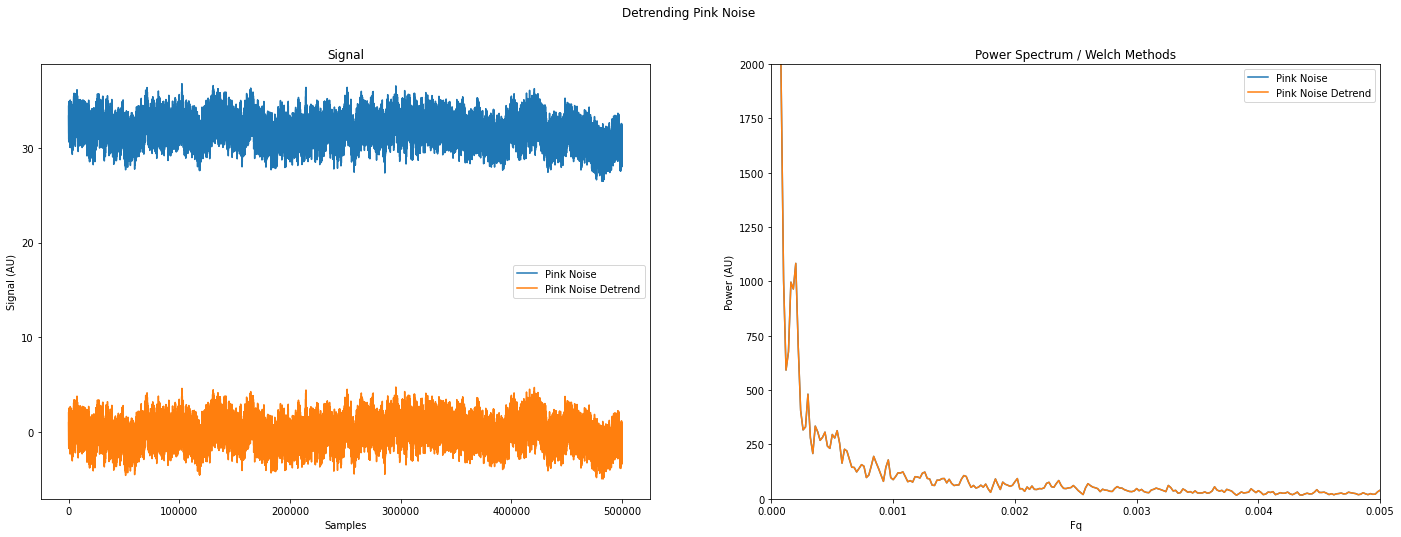

In [5]:
fig, ax = plt.subplot_mosaic('''AB''',figsize = (24,8))

plt.suptitle('Detrending Pink Noise')

ax['A'].set_title('Signal')

ax['A'].plot(y)
ax['A'].plot(y_detrend)

ax['A'].set_xlabel('Samples')
ax['A'].set_ylabel('Signal (AU)')
ax['A'].legend(['Pink Noise','Pink Noise Detrend'])

ax['B'].set_title('Power Spectrum / Welch Methods')

ax['B'].plot(f,p)
ax['B'].plot(f,p_detrend)

ax['B'].set_xlabel('Fq')
ax['B'].set_ylabel('Power (AU)')
ax['B'].set_xlim(0,0.005)
ax['B'].set_ylim(0,2000)

ax['B'].legend(['Pink Noise','Pink Noise Detrend'])